<a href="https://colab.research.google.com/github/IshantWadhwa4/COVID-19-EDA/blob/master/CoronovirusDataEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem

EDA on corona virus world data.
  - Data source (https://data.humdata.org/dataset/5dff64bc-a671-48da-aa87-2ca40d7abf02)

# Step 1. Data Collection and Cleaning

In [0]:
import pandas as pd
import numpy as np

In [0]:
# world data of confirmed cases
url_confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
data_confirmed = pd.read_csv(url_confirmed)
data_confirmed['Province/State'].fillna(data_confirmed['Country/Region'],inplace = True)

In [0]:
# world data of death cases
url_Deaths = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
data_death = pd.read_csv(url_Deaths)
data_death['Province/State'].fillna(data_death['Country/Region'],inplace = True)

In [0]:
# world data of Recovered cases
url_Recovered = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
data_Recovered = pd.read_csv(url_Recovered)
data_Recovered['Province/State'].fillna(data_Recovered['Country/Region'],inplace = True)

In [0]:
data_confirmed = data_confirmed.melt(id_vars=["Province/State", "Country/Region","Lat","Long"], 
        var_name="Date", 
        value_name="confirmed")

In [0]:
data_death = data_death.melt(id_vars=["Province/State", "Country/Region","Lat","Long"], 
        var_name="Date", 
        value_name="deaths")

In [0]:
data_Recovered = data_Recovered.melt(id_vars=["Province/State", "Country/Region","Lat","Long"], 
        var_name="Date", 
        value_name="recovered")

In [0]:
data = data_confirmed
data['deaths'] = data_death['deaths']
data['recovered'] = data_Recovered['recovered']

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6342 entries, 0 to 6341
Data columns (total 8 columns):
Province/State    6342 non-null object
Country/Region    6342 non-null object
Lat               6342 non-null float64
Long              6342 non-null float64
Date              6342 non-null object
confirmed         6342 non-null int64
deaths            6342 non-null int64
recovered         6342 non-null int64
dtypes: float64(2), int64(3), object(3)
memory usage: 396.5+ KB


# Step 2: Data Analyst and Visualization

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

In [0]:
# Top 60 States with max number of confirmed cases (Don't travel there)
temp_data = data.groupby(['Country/Region', 'Province/State'])['confirmed', 'deaths', 'recovered'].max()
temp_data_sort = temp_data.sort_values('confirmed',ascending=False)[:60]
temp_data_sort.style.background_gradient(cmap='Pastel1_r')


In [0]:
# total number of confirmed,deaths and recovered
temp_data.sum()

confirmed    92870
deaths        3160
recovered    48229
dtype: int64

In [0]:
temp_data = temp_data.reset_index()

In [0]:
# 20 States with maximum deaths reported
temp_data_sort = temp_data.sort_values('deaths',ascending=False)[:20]
temp_data_sort[['Country/Region','Province/State','deaths']].style.background_gradient(cmap='Pastel1_r')

,Country/Region,Province/State,deaths
65,Mainland China,Hubei,2835
44,Italy,Italy,79
40,Iran,Iran,77
106,South Korea,South Korea,28
64,Mainland China,Henan,22
63,Mainland China,Heilongjiang,13
54,Mainland China,Beijing,8
58,Mainland China,Guangdong,7
75,Mainland China,Shandong,6
122,US,"King County, WA",6


In [0]:
# States with no case Recovered
temp_data_recovered = temp_data[temp_data['recovered'] == 0]
temp_data_recovered = temp_data_recovered[['Country/Region', 'Province/State','confirmed', 'recovered','deaths' ]]
temp_data_recovered = temp_data_recovered.sort_values('confirmed', ascending=False)
temp_data_recovered.style.background_gradient(cmap='Pastel1_r')

,Country/Region,Province/State,confirmed,recovered,deaths
47,Kuwait,Kuwait,56,0,0
14,Bahrain,Bahrain,49,0,0
144,US,Unassigned Location (From Diamond Princess),45,0,0
93,Norway,Norway,32,0,0
41,Iraq,Iraq,32,0,0
89,Netherlands,Netherlands,24,0,0
109,Sweden,Sweden,21,0,0
12,Austria,Austria,21,0,0
49,Lebanon,Lebanon,13,0,0
37,Iceland,Iceland,11,0,0


In [0]:
# states with all the cases recovered
temp_data_recovered = temp_data[temp_data['recovered'] == temp_data['confirmed']]
temp_data_recovered = temp_data_recovered[['Country/Region', 'Province/State','confirmed', 'recovered','deaths' ]]
temp_data_recovered = temp_data_recovered.sort_values('confirmed', ascending=False)
temp_data_recovered.style.background_gradient(cmap='Pastel1_r')

,Country/Region,Province/State,confirmed,recovered,deaths
73,Mainland China,Qinghai,18,18,0
150,Vietnam,Vietnam,16,16,0
18,Cambodia,Cambodia,1,1,0
21,Canada,"London, ON",1,1,0
80,Mainland China,Tibet,1,1,0
88,Nepal,Nepal,1,1,0
108,Sri Lanka,Sri Lanka,1,1,0
116,US,"Boston, MA",1,1,0
125,US,"Madison, WI",1,1,0
141,US,"Tempe, AZ",1,1,0


In [0]:
# EDA on china data
china_data = data[data['Country/Region'] == 'Mainland China']

In [0]:
temp_china_data = china_data.groupby(['Province/State'])['confirmed', 'deaths', 'recovered'].max()
temp_china_data_sort = temp_china_data.sort_values('confirmed',ascending=False)
temp_china_data_sort = temp_china_data_sort.reset_index()
temp_china_data_sort.style.background_gradient(cmap='Pastel1_r')

,Province/State,confirmed,deaths,recovered
0,Hubei,67217,2835,36208
1,Guangdong,1350,7,1101
2,Henan,1272,22,1231
3,Zhejiang,1213,1,1093
4,Hunan,1018,4,906
5,Anhui,990,6,936
6,Jiangxi,935,1,870
7,Shandong,758,6,511
8,Jiangsu,631,0,562
9,Chongqing,576,6,490


Text(0.5, 1.0, 'Number of confirmed cases in chaina')

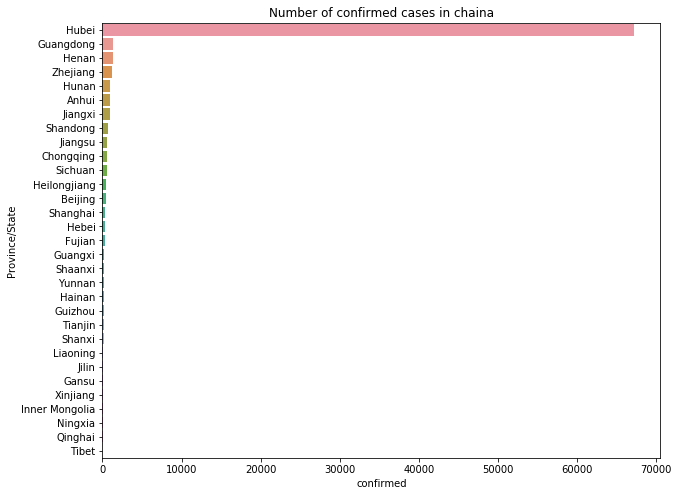

In [0]:
sns.barplot(x='confirmed',y='Province/State',data=temp_china_data_sort)
plt.title('Number of confirmed cases in china')

Text(0.5, 1.0, 'Number of deaths cases in chaina')

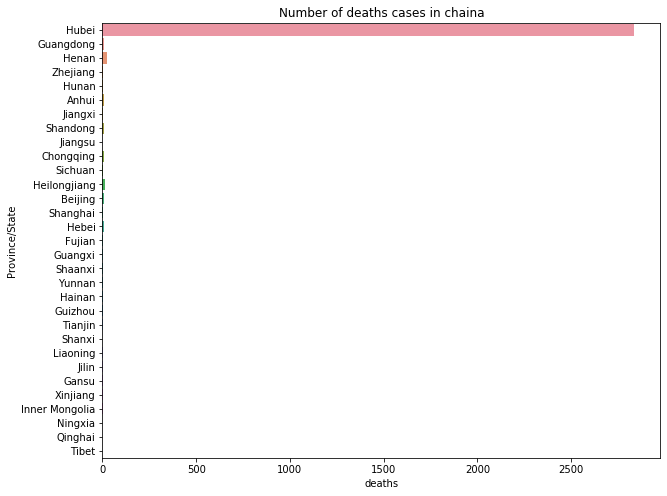

In [0]:
sns.barplot(x='deaths',y='Province/State',data=temp_china_data_sort)
plt.title('Number of deaths cases in china')

Text(0.5, 1.0, 'Number of recovered cases in chaina')

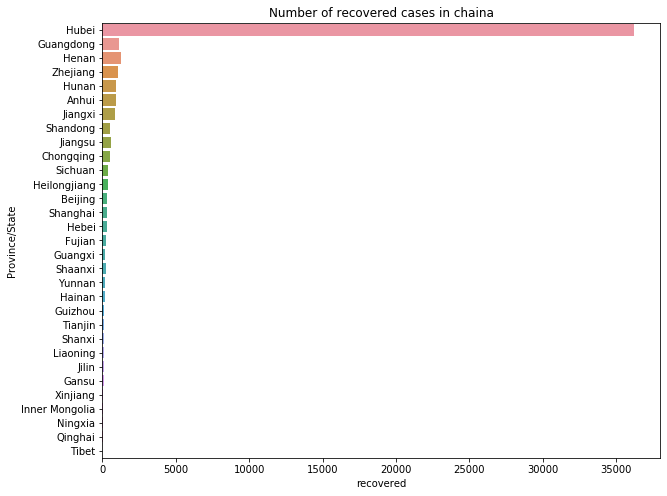

In [0]:
sns.barplot(x='recovered',y='Province/State',data=temp_china_data_sort)
plt.title('Number of recovered cases in china')

In [0]:
groupedvalues_china_data = china_data.groupby('Province/State').max().reset_index()

In [0]:
groupedvalues_china_data.drop(['Lat','Long','Country/Region','Date'],axis=1,inplace=True)

In [0]:
df_groupedvalues_china_data = groupedvalues_china_data.melt(id_vars=["Province/State"], 
        var_name="Type", 
        value_name='NumberOfPeople')

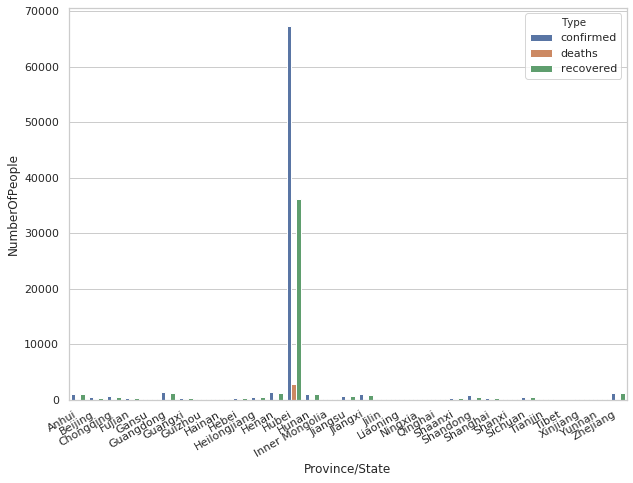

In [0]:
fig, ax = plt.subplots()
sns.set(style="whitegrid")
sns.barplot(x='Province/State',y='NumberOfPeople',data=df_groupedvalues_china_data,hue = 'Type')
fig.autofmt_xdate()



In [0]:
# EDA on world data not including china
word_data = data[data['Country/Region'] != 'Mainland China']

In [0]:
temp = word_data.groupby(['Province/State'])['confirmed', 'deaths', 'recovered'].max()
tempsort = temp.sort_values('confirmed',ascending=False)[:40]
tempsort = tempsort.reset_index()
tempsort.style.background_gradient(cmap='Pastel1_r')

,Province/State,confirmed,deaths,recovered
0,South Korea,5186,28,30
1,Italy,2502,79,160
2,Iran,2336,77,291
3,Diamond Princess cruise ship,706,6,10
4,Japan,293,6,43
5,France,204,4,12
6,Germany,196,0,16
7,Spain,165,1,2
8,Singapore,110,0,78
9,Hong Kong,100,2,37


Text(0.5, 1.0, 'Number of confirmed cases in World excluding china')

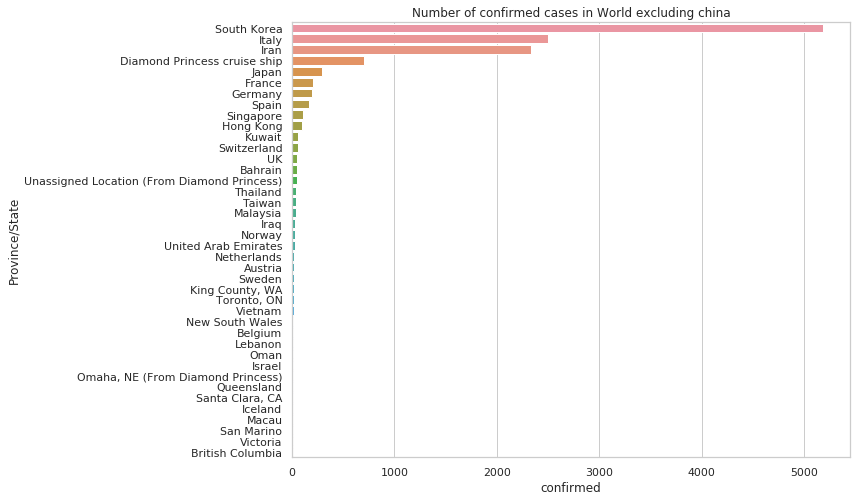

In [0]:
sns.barplot(x='confirmed',y='Province/State',data=tempsort)
plt.title('Number of confirmed cases in World excluding china')

Text(0.5, 1.0, 'Number of deaths cases in World excluding china')

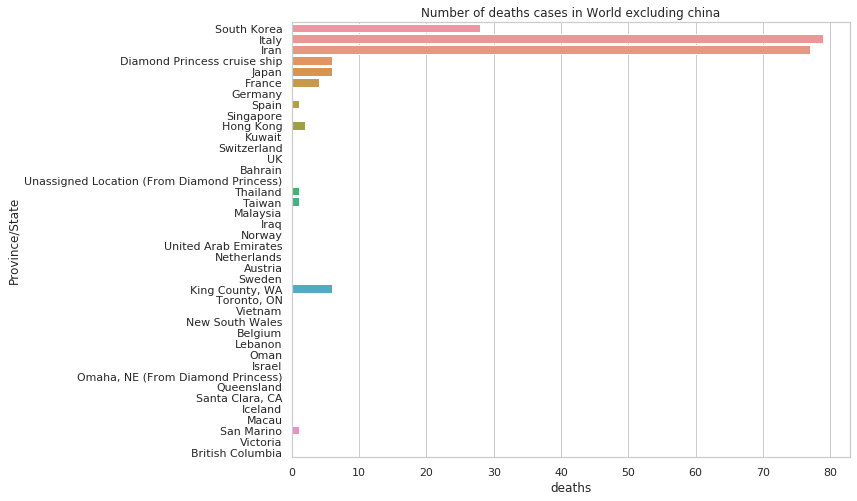

In [0]:
sns.barplot(x='deaths',y='Province/State',data=tempsort)
plt.title('Number of deaths cases in World excluding china')

Text(0.5, 1.0, 'Number of recovered cases in World excluding china')

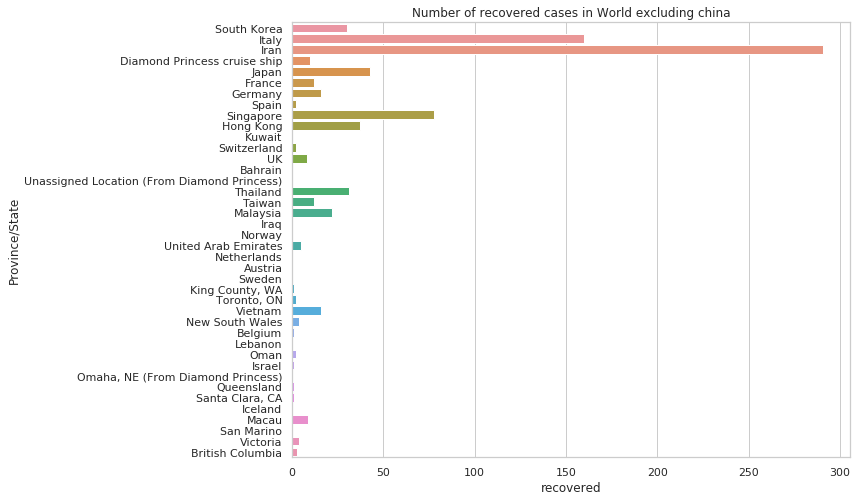

In [0]:
sns.barplot(x='recovered',y='Province/State',data=tempsort)
plt.title('Number of recovered cases in World excluding china')

In [0]:
df_groupedvalues_word_data = tempsort.melt(id_vars=["Province/State"], 
        var_name="Type", 
        value_name='NumberOfPeople')

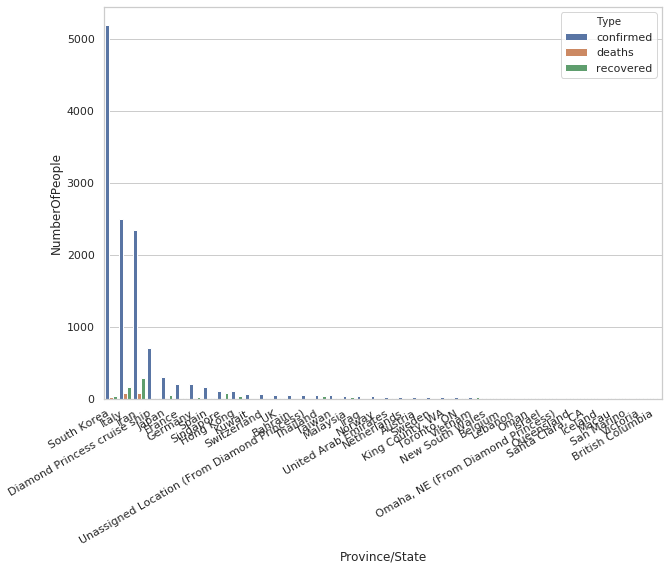

In [0]:
fig, ax = plt.subplots()
sns.set(style="whitegrid")
sns.barplot(x='Province/State',y='NumberOfPeople',data=df_groupedvalues_word_data,hue = 'Type')
fig.autofmt_xdate()